# CAPSTONE PROJECT: E COMMERECE PRODUCT DELIVERY PREDICTION

The project's goal is to develop a predictive model that determines whether a product from an e-commerce company will be delivered on time. It will also analyze different factors influencing delivery times and study customer behavior patterns related to the delivery process.

## Context

An international e-commerce firm specializing in electronics seeks to extract crucial insights from its customer database. They aim to employ sophisticated machine learning methods to analyze customer behavior and preferences.

## Data Dictionary

The dataset used for model building contained 10999 observations of 12 variables. The data contains the following information:

| Variable|	Description|
|---|-----|
| ID	|ID Number of Customers|
| Warehouse_block|	The Company have big Warehouse which is divided into block such as A,B,C,D,E|
| Mode_of_Shipment|	The Company Ships the products in multiple way such as Ship, Flight and Road|
| Customer_care_calls|	The number of calls made from enquiry for enquiry of the shipment|
| Customer_rating|	The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best)|
| Cost_of_the_Product|	Cost of the Product in US Dollars|
| Prior_purchases|	The Number of Prior Purchase|
| Product_importance|	The company has categorized the product in the various parameter such as low, medium, high|
| Gender|	Male and Female|
| Discount_offered|	Discount offered on that specific product|
| Weight_in_gms|	It is the weight in grams|
| Reached.on.Time_Y.N|	It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time|

## Step 1: Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Step 2: Load Dataset

In [6]:
# load dataset
df=pd.read_csv('C:/Users/LENOVO/E_Commerce.csv')

## Step 3: Data Preprocessing

In [9]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [11]:
# checking the information in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [13]:
#checking the shape of the dataset
df.shape

(10999, 12)

In [15]:
#checking the data type of the dataset
df.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [17]:
# check the missing values in the dataset
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [19]:
# drop ID column because it is the index column
df.drop(['ID'], axis=1, inplace=True)

In [21]:
#Checking for duplicate values
df.duplicated().sum()

0

### Descriptive Statistics

In [24]:
df.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


## Step4: Exploratory Data Analysis (EDA)

During the exploratory data analysis, I will examine how the target variable interacts with other variables and analyze the distribution of these variables within the dataset to gain a deeper understanding of the data.

### 1. Univariate Analysis

Analyze each variable independently to understand their distribution and variability.

####  Customer Gender distribution

In [31]:
df['Gender'].value_counts()

Gender
F    5545
M    5454
Name: count, dtype: int64

Text(0.5, 1.0, 'Gender Distribution')

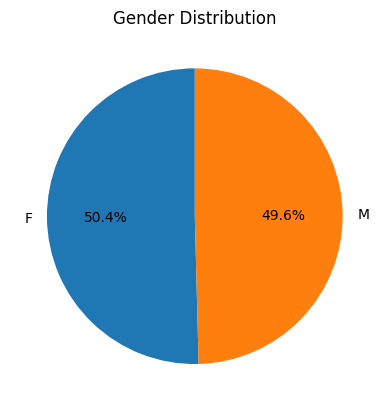

In [33]:
plt.pie(df['Gender'].value_counts(),labels = ['F','M'], autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')

We can see from the Pie chart that Male and Female Customers are almost equal to each other in the Dataset.

### Product properties

#### Product importance

In [38]:
df['Product_importance'].value_counts()

Product_importance
low       5297
medium    4754
high       948
Name: count, dtype: int64

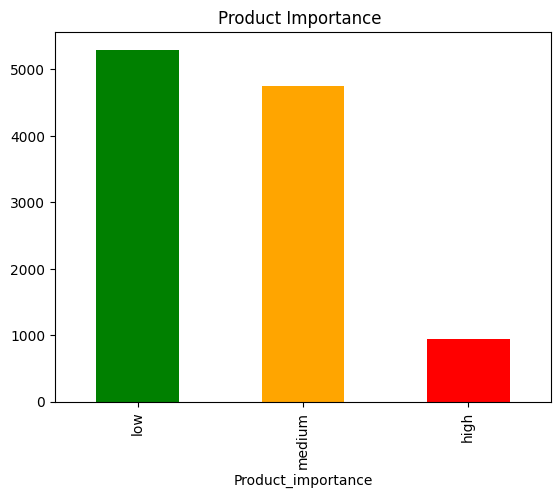

In [40]:
df['Product_importance'].value_counts().plot(kind='bar', color=['g', 'orange', 'r'])
plt.title("Product Importance ")
plt.show()

This graph is about the product importance, where majority of the products have low or medium importance.

#### Cost of the Product Distribution

In [44]:
df['Cost_of_the_Product'].value_counts()

Cost_of_the_Product
245    110
257    109
260    106
254    101
264    100
      ... 
107      5
99       5
120      5
96       5
122      4
Name: count, Length: 215, dtype: int64

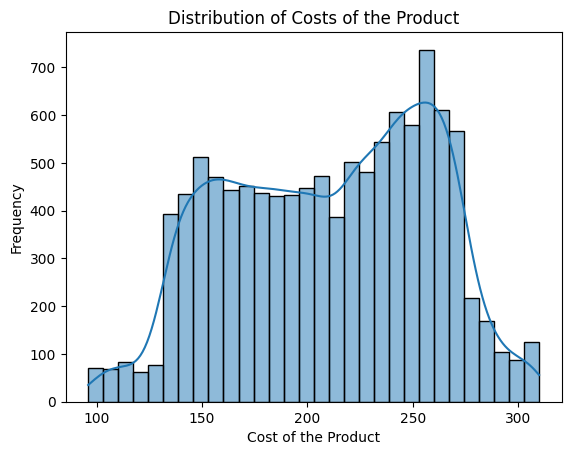

In [46]:
sns.histplot(df['Cost_of_the_Product'], kde=True)
plt.title('Distribution of Costs of the Product')
plt.xlabel('Cost of the Product')
plt.ylabel('Frequency')
plt.show()

We can see from the histogram that Cost of the Product in the Dataset is ranging from 100 to 300 and it is more skewwing towards the left side in the graph.

#### Weight Distribution of the Product

In [50]:
df['Weight_in_gms'].value_counts()

Weight_in_gms
4883    12
1145    10
5783    10
4741    10
5672    10
        ..
1425     1
3811     1
1609     1
2178     1
1098     1
Name: count, Length: 4034, dtype: int64

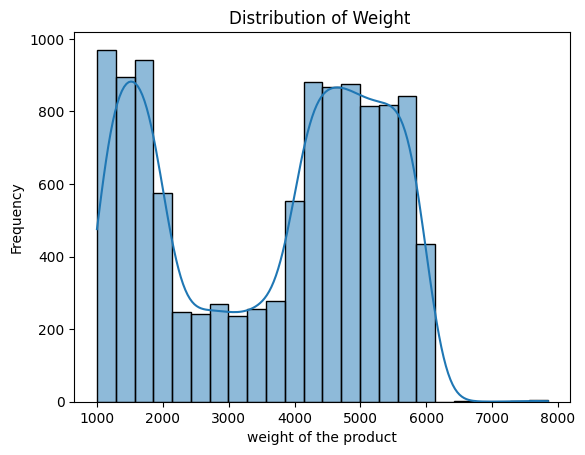

In [52]:
sns.histplot(df['Weight_in_gms'], kde=True)
plt.title('Distribution of Weight ')
plt.xlabel('weight of the product')
plt.ylabel('Frequency')
plt.show()

In this we can actually see sort of two Normally distributed curves but the second is more skewed towards the right side of the graph.we can see that the products weighing between 1000-2000 grams and 4000-6000 grams are more in number. This means that the company is selling more of the products in these weight ranges.

 These three graphs explain the distribution of product properties - Weight, Cost and Importance in the dataset. From this, I conclude that majority of the products are lighter than 6000 grams, have low
or medium importance and costs between 150-275 dollars.

### Logistic

#### Warehouse block distribution

In [58]:
df['Warehouse_block'].value_counts()

Warehouse_block
F    3666
D    1834
A    1833
B    1833
C    1833
Name: count, dtype: int64

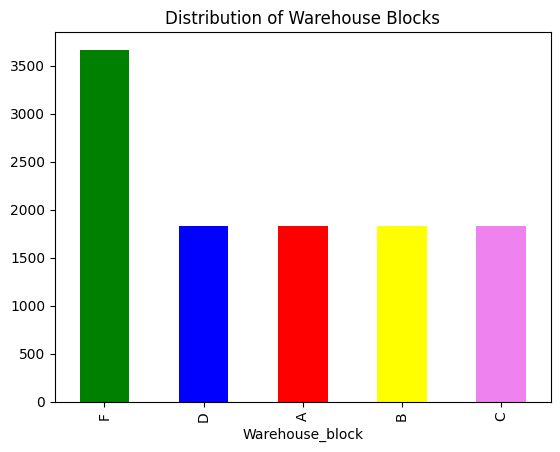

In [60]:
df['Warehouse_block'].value_counts().plot(kind='bar', color=['g','b','r','yellow','violet'])
plt.title('Distribution of Warehouse Blocks')
plt.show()

we can see that the number of products from warehouse F is most i.e. 3666, whereas rest of the warehouses have nearly equal number of products.

#### Mode of Shipment

In [64]:
df['Mode_of_Shipment'].value_counts()

Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: count, dtype: int64

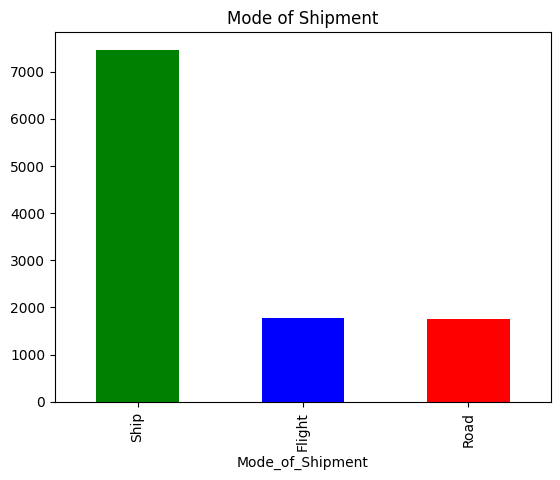

In [66]:
df['Mode_of_Shipment'].value_counts().plot(kind='bar', color=['g','b','r'])
plt.title("Mode of Shipment")
plt.show()

From this majority of the products are shipped via Ship where as nearly 2000 products are shipped by flight and road

#### Product Delivery Disribution

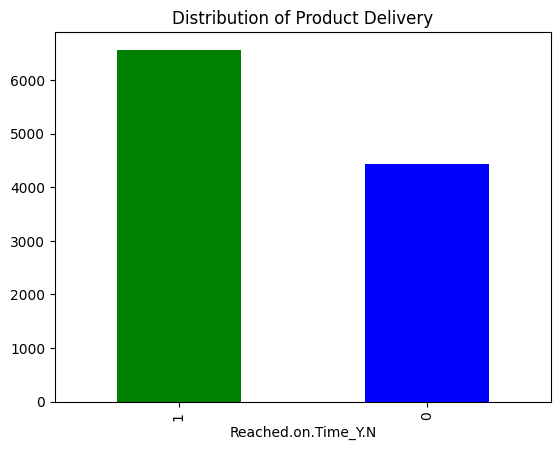

In [70]:
df['Reached.on.Time_Y.N'].value_counts().plot(kind='bar', color=['g','b'])
plt.title('Distribution of Product Delivery')
plt.show()

### Customer Experience

Text(0.5, 1.0, 'Discount Offered')

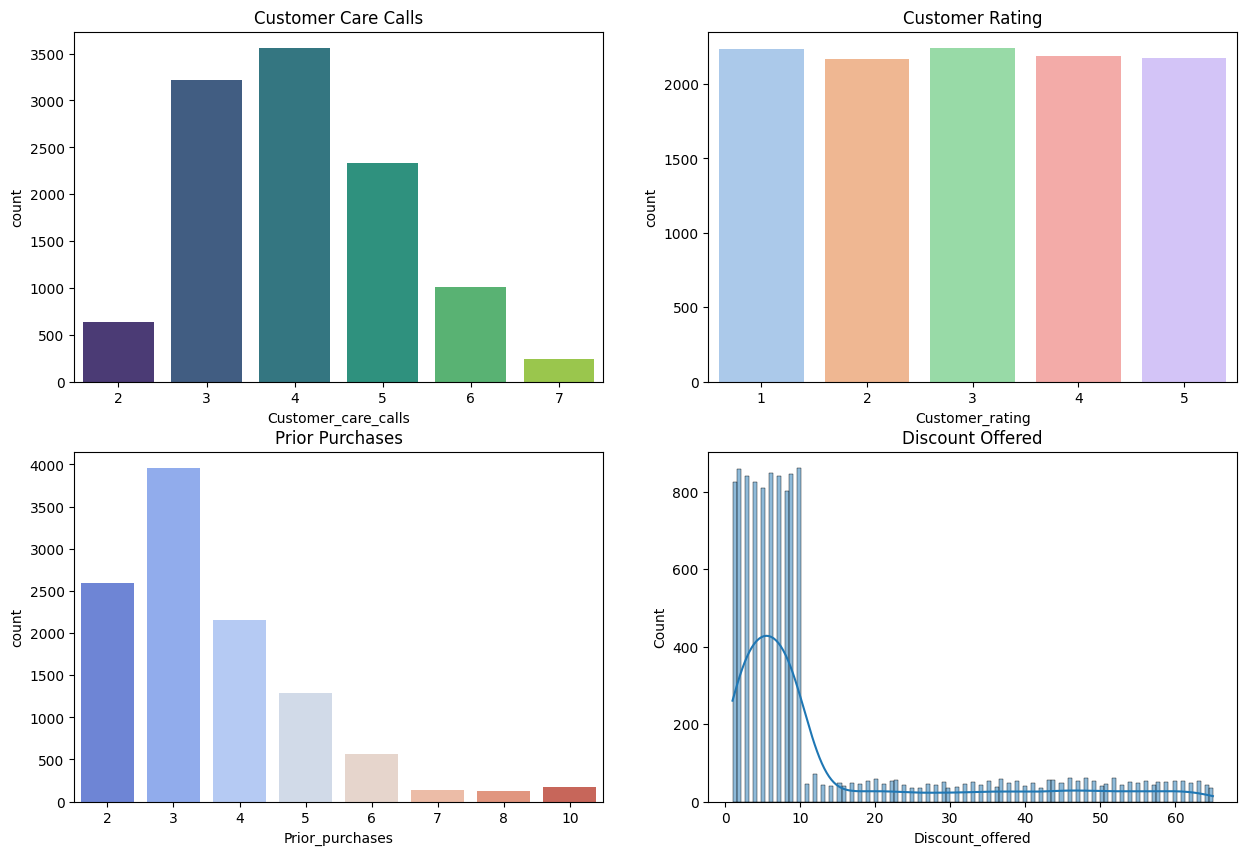

In [73]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
sns.countplot(x = 'Customer_care_calls', data = df, ax=ax[0,0],palette='viridis').set_title('Customer Care Calls')
sns.countplot(x = 'Customer_rating', data = df, ax=ax[0,1],palette='pastel').set_title('Customer Rating')
sns.countplot(x = 'Prior_purchases', data = df, ax=ax[1,0],palette='coolwarm').set_title('Prior Purchases')
sns.histplot(x = 'Discount_offered', data = df, ax=ax[1,1], kde = True).set_title('Discount Offered')

The above graphs visualizes the customer experience based on their customer care calls, rating, prior purchases and discount offered. The first graph shows the number of customer care calls done by the customers, where we can see that majority of the customers have done 3-4 calls, which could be a potential indicator, which shows that customers could be facing with the product delivery. In the second graph, we can see that the count of customer ratings across all ratings is same, but there are little more count in rating 1, which means customers are not satisfied with the service. 

The third graph is about the prior purchases done by the customers, where we can see that majority of the customers have done 2-3 prior purchases, which means that customers who are having prior purchases, they are satisfied with the service, and they are buying more products. The fourth graph is about the discount offered on the products, where we can see that majority of the products have 0-10% discount, which means that the company is not offering much discount on the products.

## Bivariate Analysis

### Customer Gender and Product Delivery

Text(0.5, 1.0, 'Gender vs Reached on Time')

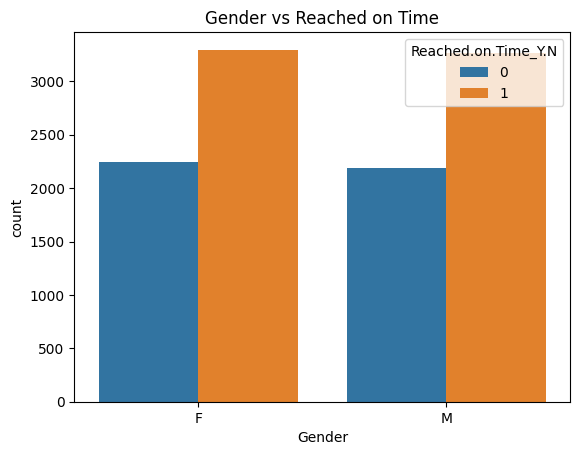

In [78]:
sns.countplot(x = 'Gender', data = df, hue = 'Reached.on.Time_Y.N').set_title('Gender vs Reached on Time')

The number of products timely delivered for both the genders is almost same, which means
there is no relation of customer gender and product delivery.


### Product Properties and Product Delivery

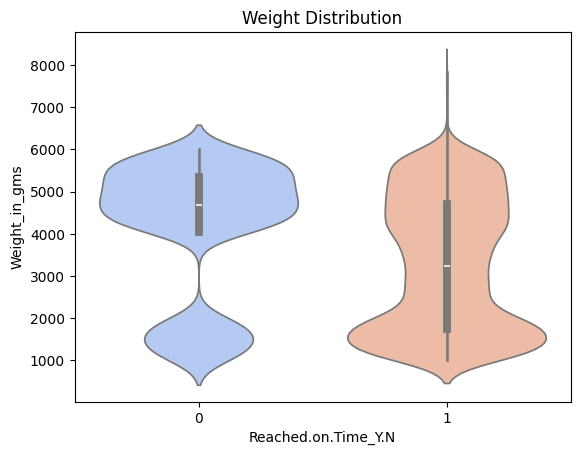

In [82]:
sns.violinplot(y = df['Weight_in_gms'], x = df['Reached.on.Time_Y.N'],palette='coolwarm').set_title('Weight Distribution')
plt.show()

Products that weight between 2500 - 3500 grams are delivered timely and the Product weight more than 4500 grams are not delivered on time.

Text(0.5, 1.0, 'Product Importance')

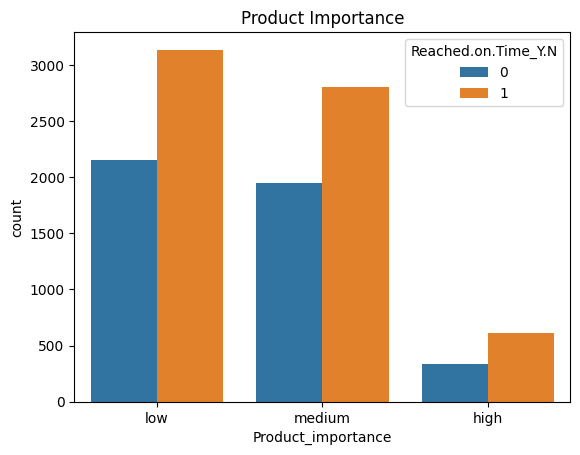

In [85]:
sns.countplot(x = 'Product_importance', data = df,hue = 'Reached.on.Time_Y.N').set_title('Product Importance')

Text(0.5, 1.0, 'Cost of the Product')

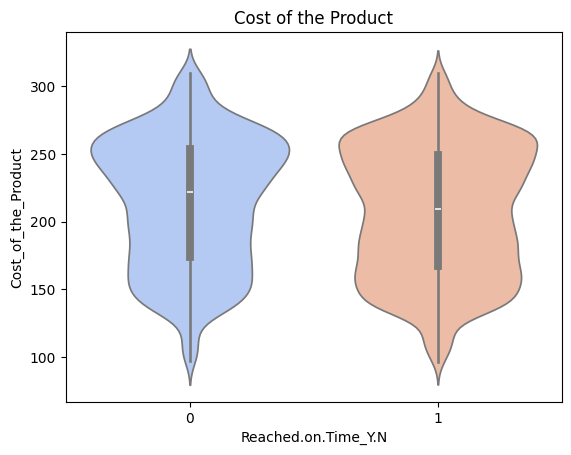

In [87]:
sns.violinplot(y = df['Cost_of_the_Product'], x = df['Reached.on.Time_Y.N'],palette='coolwarm').set_title('Cost of the Product')

The plots illustrate how product characteristics affect delivery timeliness. The first graph reveals that product weight influences delivery punctuality; specifically, products weighing over 4500 grams tend to be delivered late, whereas those in the 2500-3500 gram range are more often delivered on time. The second graph, focusing on product importance, indicates that this factor does not significantly affect delivery timeliness. The third graph shows a correlation between product cost and delivery, with products priced above $250 experiencing more frequent delivery delays.
 These observations suggest that both product weight and cost are significant factors affecting delivery timeliness.

### Logistics and Product Delivery

Text(0.5, 1.0, 'Mode of Shipment')

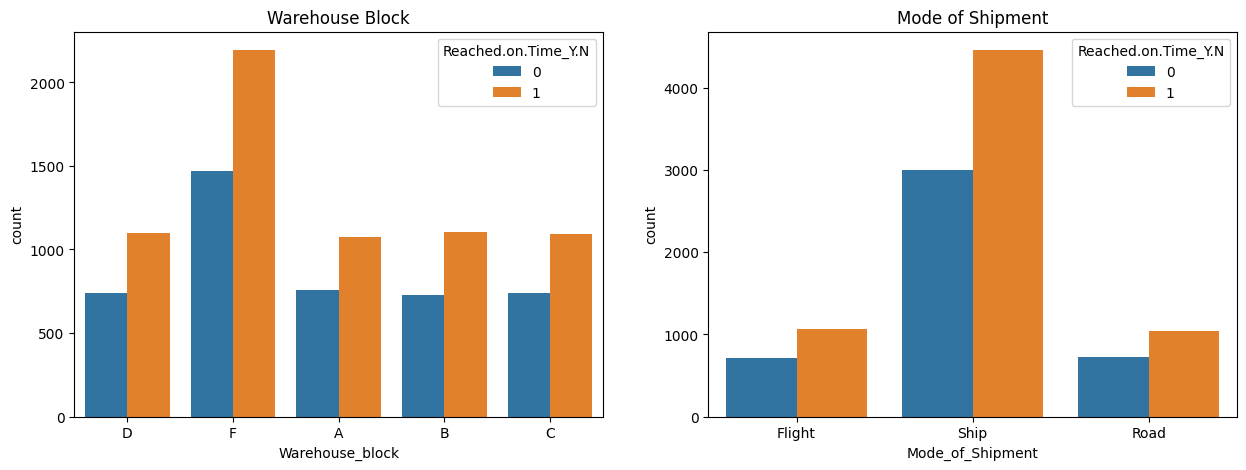

In [91]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x = 'Warehouse_block', data = df, ax=ax[0], hue = 'Reached.on.Time_Y.N').set_title('Warehouse Block')
sns.countplot(x = 'Mode_of_Shipment', data = df, ax=ax[1], hue = 'Reached.on.Time_Y.N').set_title('Mode of Shipment')

The graphs demonstrate the connection between logistics operations and the timely delivery of products. Given that the majority of products are dispatched from warehouse F, which is presumed to be near a seaport due to its high shipping volume, it's notable that the mode of shipment is predominantly by ship. However, the data shows a consistent difference in the number of products delivered on time versus late across all warehouses and shipping methods. This consistency suggests that the logistics, including the warehouse location and shipping method, do not significantly affect the timeliness of product delivery.

### Customer Experience and Product Delivery

Text(0.5, 1.0, 'Discount Offered')

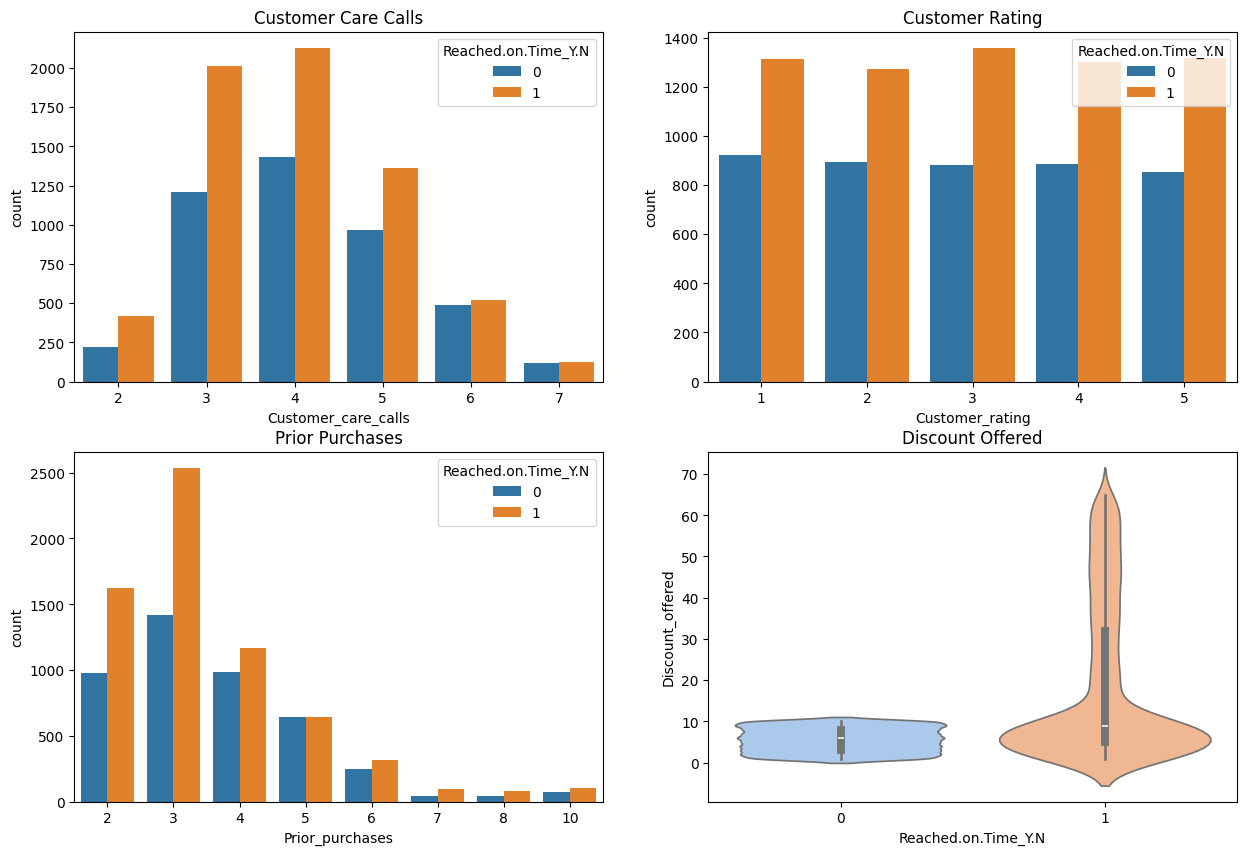

In [95]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
sns.countplot(x = 'Customer_care_calls', data = df, ax=ax[0,0],hue = 'Reached.on.Time_Y.N').set_title('Customer Care Calls')
sns.countplot(x = 'Customer_rating', data = df, ax=ax[0,1],hue = 'Reached.on.Time_Y.N').set_title('Customer Rating')
sns.countplot(x = 'Prior_purchases', data = df, ax=ax[1,0],hue = 'Reached.on.Time_Y.N').set_title('Prior Purchases')
sns.violinplot(x = 'Reached.on.Time_Y.N', y = 'Discount_offered' ,data = df, ax=ax[1,1],palette='pastel').set_title('Discount Offered')

 The first graph shows that as customer care calls increase, on-time deliveries decrease, suggesting customers call more when deliveries are late. The second graph indicates that customers with higher ratings often receive their products on time. The third graph reveals that customers who make repeat purchases tend to receive their products on time, likely encouraging their continued business. Lastly, the fourth graph shows that products with less than 10% discount are often delivered late, while those with more than 10% discount are delivered on time more frequently.

## 

## Data Preprocessing II 

### Label Encoding the Categorical Variables

In [101]:
from sklearn.preprocessing import LabelEncoder

#Label encoding object
le = LabelEncoder()

#columns for label encoding
cols = ['Warehouse_block','Mode_of_Shipment','Product_importance', 'Gender']

#label encoding
for i in cols:
    le.fit(df[i])
    df[i] = le.transform(df[i])
    print(i, df[i].unique())

Warehouse_block [3 4 0 1 2]
Mode_of_Shipment [0 2 1]
Product_importance [1 2 0]
Gender [0 1]


### Correlation Matrix Heatmap

<Axes: >

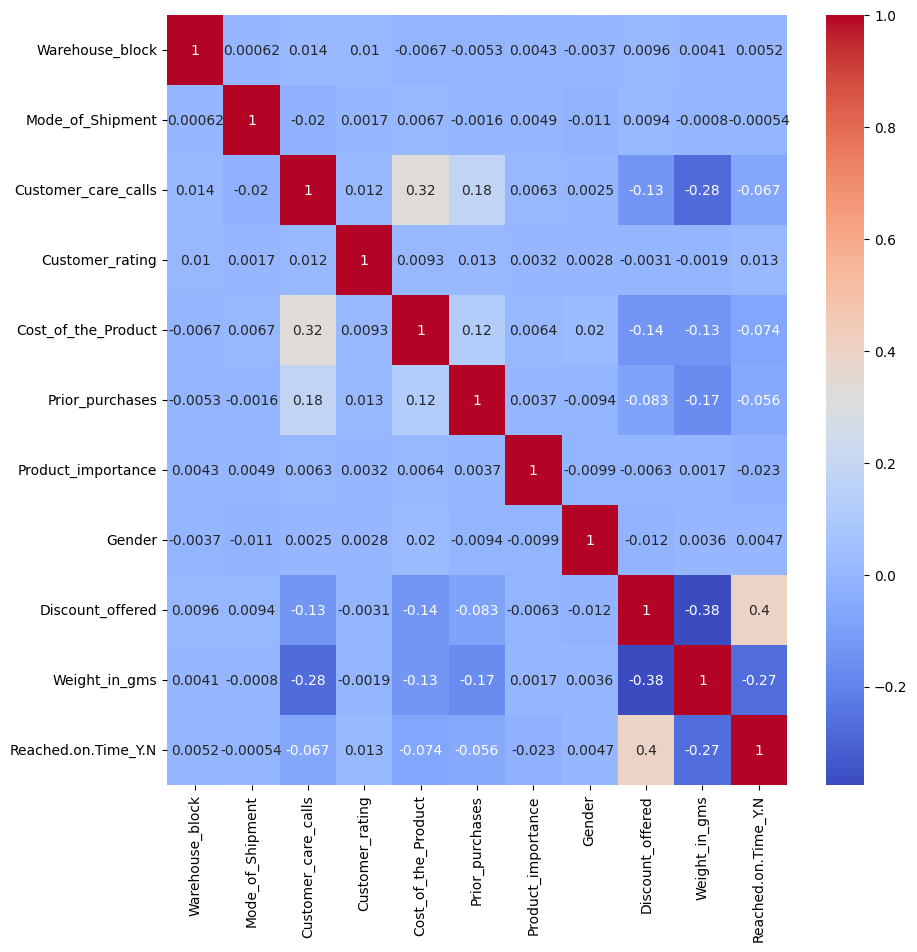

In [104]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In the correlation matrix heatmap, we can see that there is positive correlation between
cost of product and number of customer care calls.

<Axes: xlabel='Customer_care_calls', ylabel='Cost_of_the_Product'>

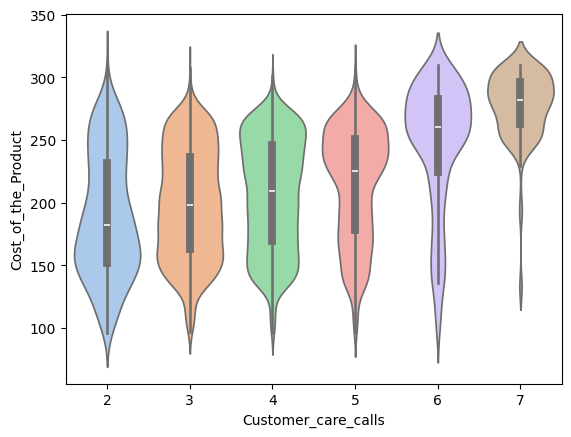

In [107]:
sns.violinplot(x = 'Customer_care_calls', y = 'Cost_of_the_Product', data = df,palette='pastel')

Customers tend to be more concerned about delivery when the product is expensive, leading to more customer service calls to check on the product's status. Therefore, ensuring timely delivery is crucial for high-cost items.

### Train Test Split

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Reached.on.Time_Y.N', axis=1), df['Reached.on.Time_Y.N'], test_size=0.2, random_state=0)

### Model Building

 Using the following models to predict the product delivery:

A. Random Forest Classifier

B. Decision Tree Classifier
 
C. Logistic Regression

D. K Nearest Neighbors

#### A. Random Forest Classifier

In [116]:
from sklearn.ensemble import RandomForestClassifier

#Random Forest Classifier Object
rfc = RandomForestClassifier()

In [118]:
#Using GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#Parameter grid
param_grid = {
    'max_depth': [4,8,12,16],
    'min_samples_leaf': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
}


In [120]:
#GridSearchCV object
grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

#Fitting the model
grid.fit(X_train, y_train)

#Best parameters
print('Best parameters: ', grid.best_params_)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Best parameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 2, 'random_state': 42}


In [122]:
#Random Forest Classifier Object
rfc = RandomForestClassifier(criterion='gini', max_depth=8, min_samples_leaf=8, min_samples_split=2, random_state=42)

#Fitting the model
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=8, random_state=42)

In [124]:
#Training accuracy
print('Training accuracy: ', rfc.score(X_train, y_train))

Training accuracy:  0.7253096942834413


In [126]:
#predicting the test set results
rfc_pred = rfc.predict(X_test)

### Decision Tree Classifier


In [129]:
from sklearn.tree import DecisionTreeClassifier
#Decision Tree Classifier Object
dtc = DecisionTreeClassifier()


In [131]:
#Using GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
#Parameter grid
param_grid = {
    'max_depth': [2,4,6,8],
    'min_samples_leaf': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]}

#GridSearchCV object
grid = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

#Fitting the model
grid.fit(X_train, y_train)

#Best parameters
print('Best parameters: ', grid.best_params_)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Best parameters:  {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 2, 'random_state': 0}


In [ ]:
#Decision Tree Classifier Object
dtc = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf=6, min_samples_split=2, random_state=0, class_weight='balanced')

#Fitting the model
dtc.fit(X_train, y_train)

In [ ]:
#Training accuracy
print('Training accuracy: ', dtc.score(X_train, y_train))

In [ ]:
#predicting the test set results
dtc_pred = dtc.predict(X_test)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

#Logistic Regression Object
logr = LogisticRegression()

In [ ]:
#fitting the model
logr.fit(X_train, y_train)

In [ ]:
#Training accuracy
logr.score(X_train, y_train)

In [ ]:
#predicting the test set results
logr_pred = lr.predict(X_test)

### K Nearest Neighbors (KNN)

In [226]:
from sklearn.neighbors import KNeighborsClassifier

#KNN Classifier Object
knn = KNeighborsClassifier()

In [228]:
#fitting the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [230]:
#training accuracy
knn.score(X_train, y_train)

0.7782702579838618

In [232]:
#predicting the test set results
knn_pred = knn.predict(X_test)

## Model Evaluation

In [235]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, r2_score, mean_squared_error

Text(0.5, 1.0, 'KNN Classifier')

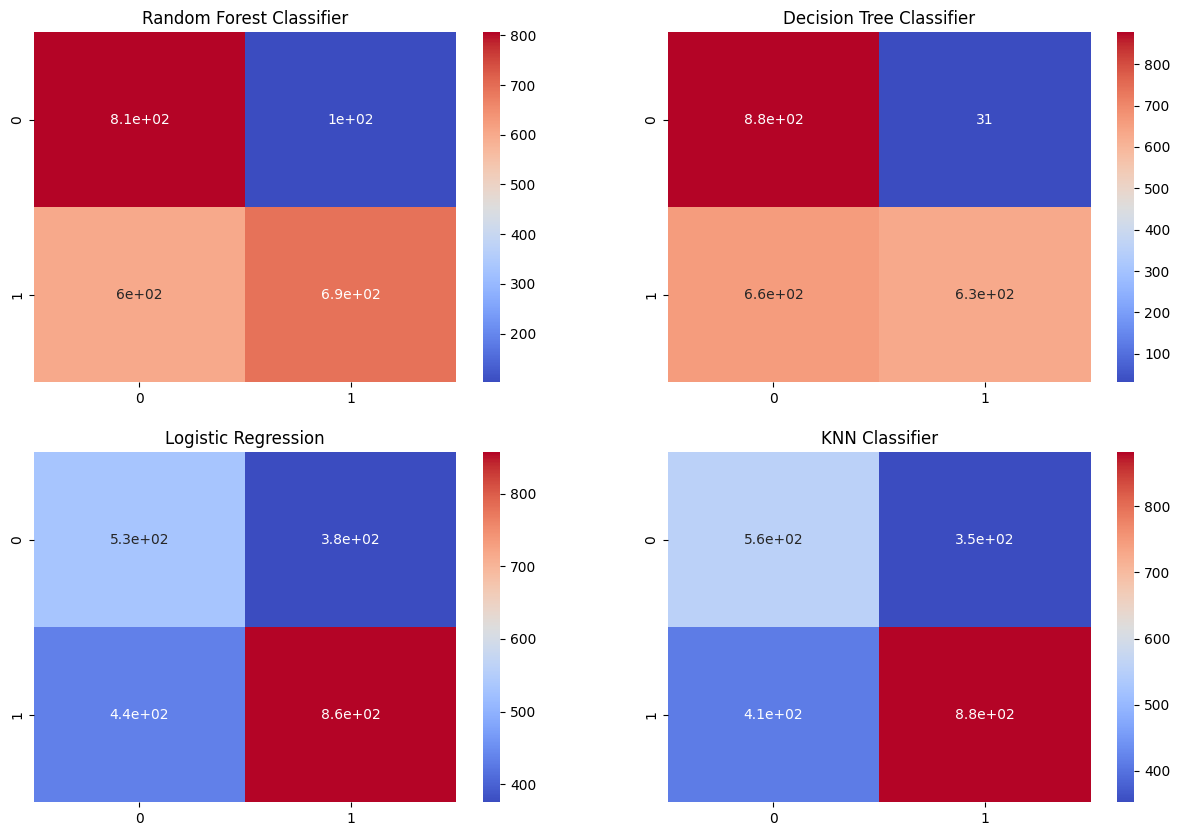

In [237]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, cmap='coolwarm', ax=ax[0,0]).set_title('Random Forest Classifier')
sns.heatmap(confusion_matrix(y_test, dtc_pred), annot=True, cmap='coolwarm', ax=ax[0,1]).set_title('Decision Tree Classifier')
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, cmap='coolwarm', ax=ax[1,0]).set_title('Logistic Regression')
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, cmap='coolwarm', ax=ax[1,1]).set_title('KNN Classifier')

### classification report

In [240]:
print('Random Forest Classifier: \n', classification_report(y_test, rfc_pred))
print('Decision Tree Classifier: \n', classification_report(y_test, dtc_pred))
print('Logistic Regression: \n', classification_report(y_test, lr_pred))
print('KNN Classifier: \n', classification_report(y_test, knn_pred))

Random Forest Classifier: 
               precision    recall  f1-score   support

           0       0.57      0.89      0.70       908
           1       0.87      0.54      0.66      1292

    accuracy                           0.68      2200
   macro avg       0.72      0.71      0.68      2200
weighted avg       0.75      0.68      0.68      2200

Decision Tree Classifier: 
               precision    recall  f1-score   support

           0       0.57      0.97      0.72       908
           1       0.95      0.49      0.65      1292

    accuracy                           0.69      2200
   macro avg       0.76      0.73      0.68      2200
weighted avg       0.80      0.69      0.68      2200

Logistic Regression: 
               precision    recall  f1-score   support

           0       0.55      0.59      0.57       908
           1       0.70      0.66      0.68      1292

    accuracy                           0.63      2200
   macro avg       0.62      0.63      0.62      

### Model Comparison

Text(0, 0.5, 'Accuracy')

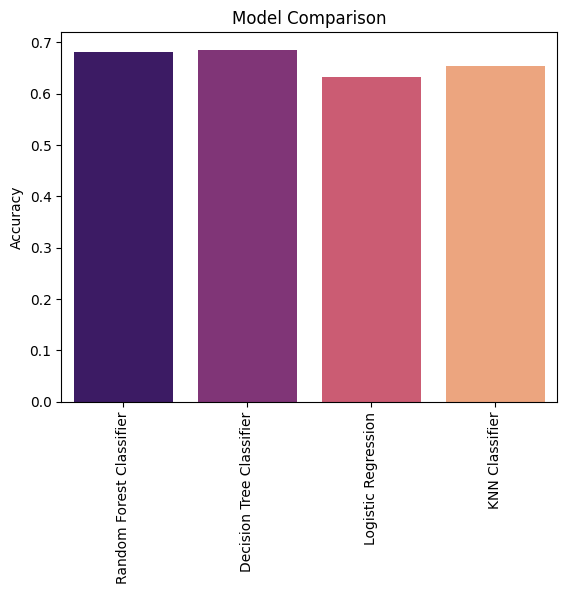

In [243]:
models = ['Random Forest Classifier', 'Decision Tree Classifier', 'Logistic Regression', 'KNN Classifier']
accuracy = [accuracy_score(y_test, rfc_pred), accuracy_score(y_test, dtc_pred), accuracy_score(y_test, lr_pred), accuracy_score(y_test, knn_pred)]
sns.barplot(x=models, y=accuracy, palette='magma').set_title('Model Comparison')
plt.xticks(rotation=90)
plt.ylabel('Accuracy')

## CONCLUSION

The project's objective was to forecast on-time delivery for an e-commerce company's products and to explore factors influencing delivery times and customer behavior. The exploratory analysis highlighted that product weight and cost are crucial to delivery success, with products in the 2500-3500 gram range and priced under $250 being more likely to arrive on time. A significant volume of products was dispatched from warehouse F using shipping, suggesting its proximity to a seaport.

 Customer behavior also sheds light on delivery outcomes. An increase in customer care calls often correlates with delivery delays. In contrast, customers with a history of multiple purchases tend to experience more punctual deliveries, which might explain their repeat business. As for discounts, products with minimal discounts (0-10%) saw more late deliveries, while those with discounts exceeding 10% were more often delivered on time.
 
 Regarding machine learning models, the decision tree classifier outperformed others with a 69% accuracy rate. Close behind were the random forest classifier and logistic regression, with 68% and 67% accuracy, respectively. The K Nearest Neighbors model trailed with the least accuracy at 65%.
 